## Understanding Uncertainty Exam

## Nicholas Thornton (vuk8az)

1. ## You're a data scientist at the Bureau of Labor Statistics, tasked with evaluating a new policy proposal.

Measuring employment and the labor force is difficult. One of the new challenges is the
size and scope of the gig economy, which has made previous classifications somewhat
obsolete.

In the latest wave of results, the data reveal:
- 60% of Americans are employed
- Among those 60%,
    - 70% are employed full time
    - 30% are employed either part time, in the gig economy, or self-employed

1. Consider this as a probability space. Write out the set of outcomes, events, and the
probabilities of each event

### Outcomes (sample space)

Let the sample space be

$$
\Omega = \{\text{FT},\ \text{NFT},\ \text{U}\},
$$

where

- $\text{FT}$ = employed full time  
- $\text{NFT}$ = employed non-full-time (part time, gig economy, or self-employed)  
- $\text{U}$ = not employed  

### Events (event space)

The event space is the power set of $\Omega$:

$$
\mathcal{F} = 2^\Omega = \{\emptyset,\ \{\text{FT}\},\ \{\text{NFT}\},\ \{\text{U}\},\ \{\text{FT},\text{NFT}\},\ \{\text{FT},\text{U}\},\ \{\text{NFT},\text{U}\},\ \Omega\}.
$$

### Probabilities

Given:
- $P(\text{employed}) = 0.60$
- $P(\text{FT}\mid \text{employed}) = 0.70$
- $P(\text{NFT}\mid \text{employed}) = 0.30$

So the outcome probabilities are:

$$
P(\text{FT}) = 0.60 \cdot 0.70 = 0.42
$$

$$
P(\text{NFT}) = 0.60 \cdot 0.30 = 0.18
$$

$$
P(\text{U}) = 1 - 0.60 = 0.40
$$

For any event $A \subseteq \Omega$, its probability is the sum of its outcomes' probabilities. For example,

$$
P(\{\text{FT},\text{NFT}\}) = P(\text{FT}) + P(\text{NFT}) = 0.42 + 0.18 = 0.60
$$

and

$$
P(\emptyset)=0,\quad P(\Omega)=1.
$$

2. What percentage of Americans are employed full time? What percentage of
Americans are employed part time, in the gig economy, or self-employed?

We are given $P(\text{employed}) = 0.60$, $P(\text{FT}\mid \text{employed}) = 0.70$, and $P(\text{NFT}\mid \text{employed}) = 0.30$.

Thus,

$$
P(\text{FT}) = P(\text{employed})P(\text{FT}\mid \text{employed})
= 0.60 \cdot 0.70 = 0.42,
$$

so **42%** of Americans are employed full time.

Also,

$$
P(\text{NFT}) = P(\text{employed})P(\text{NFT}\mid \text{employed})
= 0.60 \cdot 0.30 = 0.18,
$$

so **18%** of Americans are employed part time, in the gig economy, or self-employed.

In [1]:
p_employed = 0.60
p_ft_given_employed = 0.70
p_nft_given_employed = 0.30

p_ft = p_employed * p_ft_given_employed
p_nft = p_employed * p_nft_given_employed

ft_percent = 100 * p_ft
nft_percent = 100 * p_nft

print(f"Full-time employed: {ft_percent:.0f}%")
print(f"Non-full-time employed (part-time/gig/self-employed): {nft_percent:.0f}%")

Full-time employed: 42%
Non-full-time employed (part-time/gig/self-employed): 18%


3. Suppose there's a policy proposal that will reduce income taxes on gig economy or
self-employed persons by $1,000 because many of their expenses overlap with their
work (e.g. buying gas, driving for Uber). What's the maximum expected loss in revenue
of the policy, if there are 342 million Americans?

Suppose the tax cut applies to gig economy or self-employed people. The broadest group we have data for is the non-full-time employed group (part time, gig economy, or self-employed), which is $P(\text{NFT}) = 0.18$.

A maximum expected revenue loss assumes every person in this $18\%$ group gets the $1000$ tax cut.

Expected number receiving the cut:

$$
342{,}000{,}000 \cdot 0.18 = 61{,}560{,}000
$$

Maximum expected revenue loss:

$$
61{,}560{,}000 \cdot 1000 = 61{,}560{,}000{,}000
$$

So the maximum expected revenue loss is

$$
\$61.56\text{ billion}.
$$

In [2]:
population = 342_000_000
p_nft = 0.18
tax_cut = 1_000

expected_people = population * p_nft
expected_loss = expected_people * tax_cut

print(f"Expected eligible people (max): {expected_people:,.0f}")
print(f"Maximum expected revenue loss: ${expected_loss:,.0f}")
print(f"Maximum expected revenue loss (billions): ${expected_loss/1e9:.2f}B")

Expected eligible people (max): 61,560,000
Maximum expected revenue loss: $61,560,000,000
Maximum expected revenue loss (billions): $61.56B


4. Why is your answer in 3 only an upper bound? What additional data would you need to
provide a more accurate prediction?

It is only an upper bound because the $18\%$ figure we used is the share of Americans in the broad category $\text{NFT}$, which includes part time workers as well as gig economy and self-employed workers. The policy applies only to gig economy or self-employed persons, so treating all $\text{NFT}$ workers as eligible overcounts the eligible population.

To make a more accurate prediction, we would need:
- The fraction of Americans who are specifically in the gig economy or self-employed, ideally $P(\text{gig or self-employed})$, rather than the broader $P(\text{NFT})$.
- Whether the policy applies to all gig/self-employed workers or only those who meet certain criteria (income thresholds, filing status, minimum expenses, etc.).
- The size of the tax cut each eligible person would actually claim, since "$1000 reduction" could be capped, phased out, or not fully usable for all individuals.
- Any behavioral responses that could change the number of people reporting gig/self-employment income after the policy is introduced.

## 2. Consider the uniform distribution between $a$ and $b$:

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{x-a}{b-a}, & a \le x \le b \\
1, & x > b
\end{cases}
$$
with $b > a$.

1. What is the probability density function for $F$? Make a sketch of the pdf.

The pdf is the derivative of $F(x)$ on the interval where it is differentiable.

For $x<a$, $F(x)=0$ so $f(x)=0$.  
For $a<x<b$,

$$
f(x) = \frac{d}{dx}\left(\frac{x-a}{b-a}\right) = \frac{1}{b-a}.
$$

For $x>b$, $F(x)=1$ so $f(x)=0$.

Thus,

$$
f(x)=
\begin{cases}
\frac{1}{b-a}, & a \le x \le b \\
0, & \text{otherwise}.
\end{cases}
$$

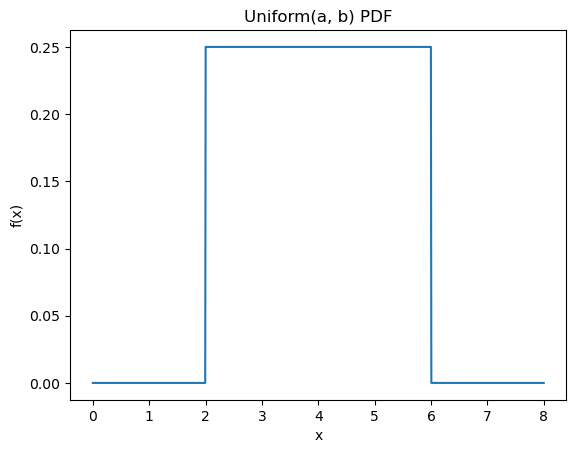

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a = 2  # Can be any value
b = 6  # Can be any value greater than a

x = np.linspace(a - 2, b + 2, 1000)
f = np.where((x >= a) & (x <= b), 1/(b-a), 0)

plt.figure()
plt.plot(x, f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Uniform(a, b) PDF")
plt.show()

2. What is $\mathbb{E}[X]$?


For $X \sim U(a,b)$ with $b>a$, the pdf is

$$
f(x)=
\begin{cases}
\frac{1}{b-a}, & a \le x \le b \\
0, & \text{otherwise}.
\end{cases}
$$

Then

$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} x f(x)\,dx = \int_a^b x\frac{1}{b-a}\,dx
= \frac{1}{b-a}\left[\frac{x^2}{2}\right]_a^b
= \frac{1}{b-a}\cdot\frac{b^2-a^2}{2}
= \frac{a+b}{2}.
$$

In [4]:
import sympy as sp

a, b = sp.symbols("a b", positive=True)  # define symbolic parameters a and b
x = sp.symbols("x")                       # define the integration variable

# compute E[X] = ∫_a^b x * (1/(b-a)) dx for X ~ Uniform(a,b)
E = sp.integrate(x * (1/(b-a)), (x, a, b))

print(f"E[X]: {sp.simplify(E)}")

E[X]: a/2 + b/2


3. What is $\mathbb{V}[X]$?

For $X \sim U(a,b)$ with $b>a$,

$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2.
$$

We already have

$$
\mathbb{E}[X] = \frac{a+b}{2}.
$$

Compute $\mathbb{E}[X^2]$:

$$
\mathbb{E}[X^2] = \int_a^b x^2 \frac{1}{b-a}\,dx
= \frac{1}{b-a}\left[\frac{x^3}{3}\right]_a^b
= \frac{b^3-a^3}{3(b-a)}.
$$

Use $b^3-a^3=(b-a)(b^2+ab+a^2)$ to simplify:

$$
\mathbb{E}[X^2] = \frac{b^2+ab+a^2}{3}.
$$

Thus,

$$
\mathbb{V}[X]
= \frac{b^2+ab+a^2}{3} - \left(\frac{a+b}{2}\right)^2
= \frac{b^2+ab+a^2}{3} - \frac{a^2+2ab+b^2}{4}
= \frac{(b-a)^2}{12}.
$$

In [5]:

a, b = sp.symbols("a b", positive=True)  # symbolic interval endpoints with b>a assumed later
x = sp.symbols("x")                      # integration variable

# compute E[X] for Uniform(a,b): ∫_a^b x * (1/(b-a)) dx
E1 = sp.integrate(x * (1/(b-a)), (x, a, b))

# compute E[X^2] for Uniform(a,b): ∫_a^b x^2 * (1/(b-a)) dx
E2 = sp.integrate(x**2 * (1/(b-a)), (x, a, b))

# variance via Var(X) = E[X^2] - (E[X])^2
V = sp.simplify(E2 - E1**2)

print(f"E[X]: {sp.simplify(E1)}")
print(f"E[X^2]: {sp.simplify(E2)}")
print(f"Var(X): {V}")

E[X]: a/2 + b/2
E[X^2]: a**2/3 + a*b/3 + b**2/3
Var(X): a**2/12 - a*b/6 + b**2/12


4. How do the expectation and variance vary with $b$ and $a$? Explain your reasoning, alongside any calculations.

For $X \sim U(a,b)$ with $b>a$, we have

$$
\mathbb{E}[X] = \frac{a+b}{2}
\quad \text{and} \quad
\mathbb{V}[X] = \frac{(b-a)^2}{12}.
$$

The expectation depends on the midpoint of the interval. If we increase $a$ or $b$ while holding the other endpoint fixed, the midpoint increases, so $\mathbb{E}[X]$ increases. Specifically,

$$
\frac{\partial}{\partial a}\mathbb{E}[X] = \frac{1}{2},
\qquad
\frac{\partial}{\partial b}\mathbb{E}[X] = \frac{1}{2}.
$$

The variance depends only on the width of the interval, $b-a$. If we shift both endpoints by the same amount (so $b-a$ stays fixed), $\mathbb{V}[X]$ does not change. If we increase the width $b-a$, the variance increases quadratically. In particular,

$$
\frac{\partial}{\partial a}\mathbb{V}[X] = \frac{\partial}{\partial a}\left(\frac{(b-a)^2}{12}\right)
= -\frac{b-a}{6},
\qquad
\frac{\partial}{\partial b}\mathbb{V}[X] = \frac{b-a}{6}.
$$

So increasing $b$ (holding $a$ fixed) increases the variance, and increasing $a$ (holding $b$ fixed) decreases the variance, because those changes widen or shrink the interval.

In [6]:
a, b = sp.symbols("a b", positive=True)
E = (a + b) / 2
V = (b - a)**2 / 12

dE_da = sp.diff(E, a)
dE_db = sp.diff(E, b)
dV_da = sp.diff(V, a)
dV_db = sp.diff(V, b)

print(f"E[X]: {E}")
print(f"Var(X): {V}")
print(f"d/d a E[X]: {dE_da}")
print(f"d/d b E[X]: {dE_db}")
print(f"d/d a Var(X): {dV_da}")
print(f"d/d b Var(X): {dV_db}")

E[X]: a/2 + b/2
Var(X): (-a + b)**2/12
d/d a E[X]: 1/2
d/d b E[X]: 1/2
d/d a Var(X): a/6 - b/6
d/d b Var(X): -a/6 + b/6


## 3. You are a data scientist working for the CDC. A new, virulent, and deadly disease has been detected.

With the sparse data available, they want a simple model, now, that can be compared to other diseases in terms of severity. You fondly remember your time at SDS, and recall that the topic of Survival/Duration/Arrival processes is concerned with the amount of time it takes something to happen.

Because you were a diligent student, you also remember that the simplest such model is the exponential distribution:

$$
F(t) = 1 - e^{-\lambda t},
$$

with $t, \lambda > 0$.

1. Explain how the exponential distribution can be interpreted as a model that predicts, for each $t$, the probability that the process terminates before that time is reached. The survival curve is defined as $S(t) = 1 - F(t)$. Explain the probabilistic interpretation of this quantity in terms of predicting mortality in a disease outbreak.

Let $T$ be the random time until a terminal event occurs (for example, time until death). The exponential CDF

$$
F(t) = P(T \le t) = 1 - e^{-\lambda t}
$$

gives, for each time $t$, the probability that the terminal event has occurred by time $t$.

The survival curve is

$$
S(t) = 1 - F(t) = P(T > t) = e^{-\lambda t}.
$$

In a disease outbreak, $S(t)$ can be interpreted as the probability an infected individual survives past time $t$ (has not yet experienced the terminal event by time $t$). A larger $\lambda$ makes $S(t)$ decay faster, meaning survival probabilities drop more quickly over time, which corresponds to a more deadly or faster-progressing disease.

2. Derive the probability density function for the exponential distribution.

We are given the CDF

$$
F(t) = 1 - e^{-\lambda t}, \quad t \ge 0,\ \lambda > 0.
$$

The pdf is the derivative of the CDF:

$$
f(t) = \frac{d}{dt}F(t) = \frac{d}{dt}\left(1 - e^{-\lambda t}\right) = \lambda e^{-\lambda t}, \quad t \ge 0.
$$

Thus,

$$
f(t)=
\begin{cases}
\lambda e^{-\lambda t}, & t \ge 0 \\
0, & t < 0.
\end{cases}
$$

3. Suppose our data are $y_1 = 2$, $y_2 = 3$, and $y_3 = 7$. What is the likelihood for these data?

For an exponential distribution with rate $\lambda$, the pdf is

$$
f(y\mid \lambda) = \lambda e^{-\lambda y}, \quad y \ge 0.
$$

Assuming $y_1,y_2,y_3$ are independent observations from this distribution, the likelihood is

$$
L(\lambda \mid y_1,y_2,y_3) = \prod_{i=1}^3 \lambda e^{-\lambda y_i}
= \lambda^3 \exp\left(-\lambda\sum_{i=1}^3 y_i\right).
$$

With $y_1=2$, $y_2=3$, $y_3=7$, we have $\sum y_i = 12$, so

$$
L(\lambda) = \lambda^3 e^{-12\lambda}, \quad \lambda > 0.
$$

In [7]:
lam = sp.symbols("lam", positive=True)  # define the rate parameter lambda (restricted to be positive)
y = [2, 3, 7]                           # observed data points

# likelihood for iid exponential data: L(lam) = ∏_i [lam * exp(-lam * y_i)]
L = sp.prod(lam * sp.exp(-lam * yi) for yi in y)

print(f"L(lambda): {sp.simplify(L)}")

L(lambda): lam**3*exp(-12*lam)


4. Derive the maximum likelihood estimator of $\lambda$.

From part 3, the likelihood is

$$
L(\lambda) = \lambda^3 e^{-12\lambda}, \quad \lambda > 0.
$$

The log-likelihood is

$$
\ell(\lambda) = \ln L(\lambda) = 3\ln \lambda - 12\lambda.
$$

Differentiate and set equal to zero:

$$
\frac{d}{d\lambda}\ell(\lambda) = \frac{3}{\lambda} - 12 = 0
\quad \Rightarrow \quad
\frac{3}{\lambda} = 12
\quad \Rightarrow \quad
\hat{\lambda} = \frac{3}{12} = \frac{1}{4}.
$$

Check the second derivative:

$$
\frac{d^2}{d\lambda^2}\ell(\lambda) = -\frac{3}{\lambda^2} < 0,
$$

so this critical point is a maximum. Thus,

$$
\hat{\lambda} = \frac{1}{4}.
$$

In [8]:
lam = sp.symbols("lam", positive=True)

# log-likelihood for L(lam) = lam^3 * exp(-12*lam)
ell = 3 * sp.log(lam) - 12 * lam

# solve first order condition d/dlam ell(lam) = 0
lam_hat = sp.solve(sp.diff(ell, lam), lam)[0]

print(f"lambda_hat: {sp.simplify(lam_hat)}")

lambda_hat: 1/4


5. Suppose a similar analysis for Ebola implied that $\hat{\lambda}_{\text{Ebola}} = 0.125$. Does your evidence suggest this outbreak is more or less deadly than Ebola? Answer in terms of $\lambda$ and survival curves.

From part 4, our outbreak has

$$
\hat{\lambda} = \frac{1}{4} = 0.25.
$$

Ebola has

$$
\hat{\lambda}_{\text{Ebola}} = 0.125.
$$

For an exponential model, the survival curve is

$$
S(t) = P(T>t) = e^{-\lambda t}.
$$

Since $0.25 > 0.125$, we have for every $t>0$:

$$
e^{-0.25t} < e^{-0.125t}.
$$

So the predicted survival probabilities are lower at all times for our outbreak than for Ebola, meaning this outbreak is more deadly (or has a faster time to termination) under the exponential model.

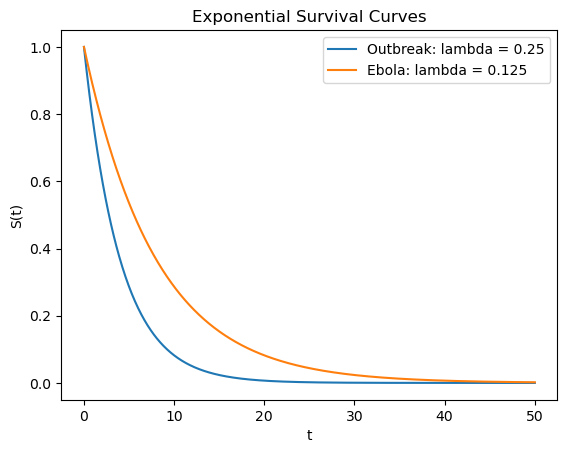

In [ ]:
lam_outbreak = 0.25
lam_ebola = 0.125

t = np.linspace(0, 50, 1000)

S_outbreak = np.exp(-lam_outbreak * t)
S_ebola = np.exp(-lam_ebola * t)

plt.figure()
plt.plot(t, S_outbreak, label="Outbreak: lambda = 0.25")
plt.plot(t, S_ebola, label="Ebola: lambda = 0.125")
plt.xlabel("t")
plt.ylabel("S(t)")
plt.title("Exponential Survival Curves")
plt.legend()
plt.show()

In [10]:
mean_outbreak = 1 / lam_outbreak
mean_ebola = 1 / lam_ebola

median_outbreak = np.log(2) / lam_outbreak
median_ebola = np.log(2) / lam_ebola

print(f"Mean time (Outbreak): {mean_outbreak:.2f}")
print(f"Mean time (Ebola): {mean_ebola:.2f}")
print(f"Median time (Outbreak): {median_outbreak:.2f}")
print(f"Median time (Ebola): {median_ebola:.2f}")

Mean time (Outbreak): 4.00
Mean time (Ebola): 8.00
Median time (Outbreak): 2.77
Median time (Ebola): 5.55
